In [136]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [106]:
!pip install kneed

In [3]:
df = pd.read_csv("smartcart_customers.csv")

In [4]:
df.isnull().sum()
df.duplicated().sum()
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [6]:
df.duplicated().sum()

np.int64(0)

# Data Preprocessing 

In [12]:
# Handling nullls
df.isnull().sum()
df["Income"] = df["Income"].fillna(df["Income"]).mean()

In [15]:
df.isnull().sum() # no nulls values 
df.duplicated().sum() - # no duplicated value

np.int64(0)

# Feature engineering

In [5]:
df.shape


(2240, 22)

In [12]:
# age
df["age"] = 2026 - df["Year_Birth"] 

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,customer_tenure_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [14]:
# customer joining date
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"] , dayfirst= True)

reference_date = df["Dt_Customer"].max()
df["customer_tenure_days"] = (reference_date - df["Dt_Customer"]).dt.days

In [11]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,customer_tenure_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,161


In [15]:
# spending 
df["Total_spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]                       

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,customer_tenure_days,Total_spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,69,663,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,72,113,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,61,312,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,42,139,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,45,161,422


In [18]:
#children
df["children"] = df["Kidhome"] + df["Teenhome"]

In [21]:
# Education
df["Education"] .value_counts()

# undergraduate , postgraduate ,graduate 
df["Education"] = df["Education"].replace ( {
    "Basic" : "Undergraduate" , "2n Cycle" : "Undergraduate" ,
    "Graduation" : "Graduate" ,
    "Master" : "Postgraduate" ,
    "PhD" : "Postgraduate"
})

In [25]:
# MaritAL Status 
df["Marital_Status"].value_counts()

df["Living_with"] = df["Marital_Status"] .replace ({
    "Married" : "Partner" , "Together" : "Partner" ,
    "Single" : "Alone" ,"Divorced" : "Alone" ,
    "Widow" : "Alone" , "Absurd" : "Alone" , "YOLO" : "Alone" })

In [30]:
# Drop Columns
cols = ["ID" , "Year_Birth" ,"Marital_Status", "Kidhome" , "Teenhome" ,"Dt_Customer" ]
spending_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
total_cols = cols + spending_cols
df_cleaned = df.drop(columns = total_cols)

In [31]:
df_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'age',
       'customer_tenure_days', 'Total_spending', 'children', 'Living_with'],
      dtype='object')

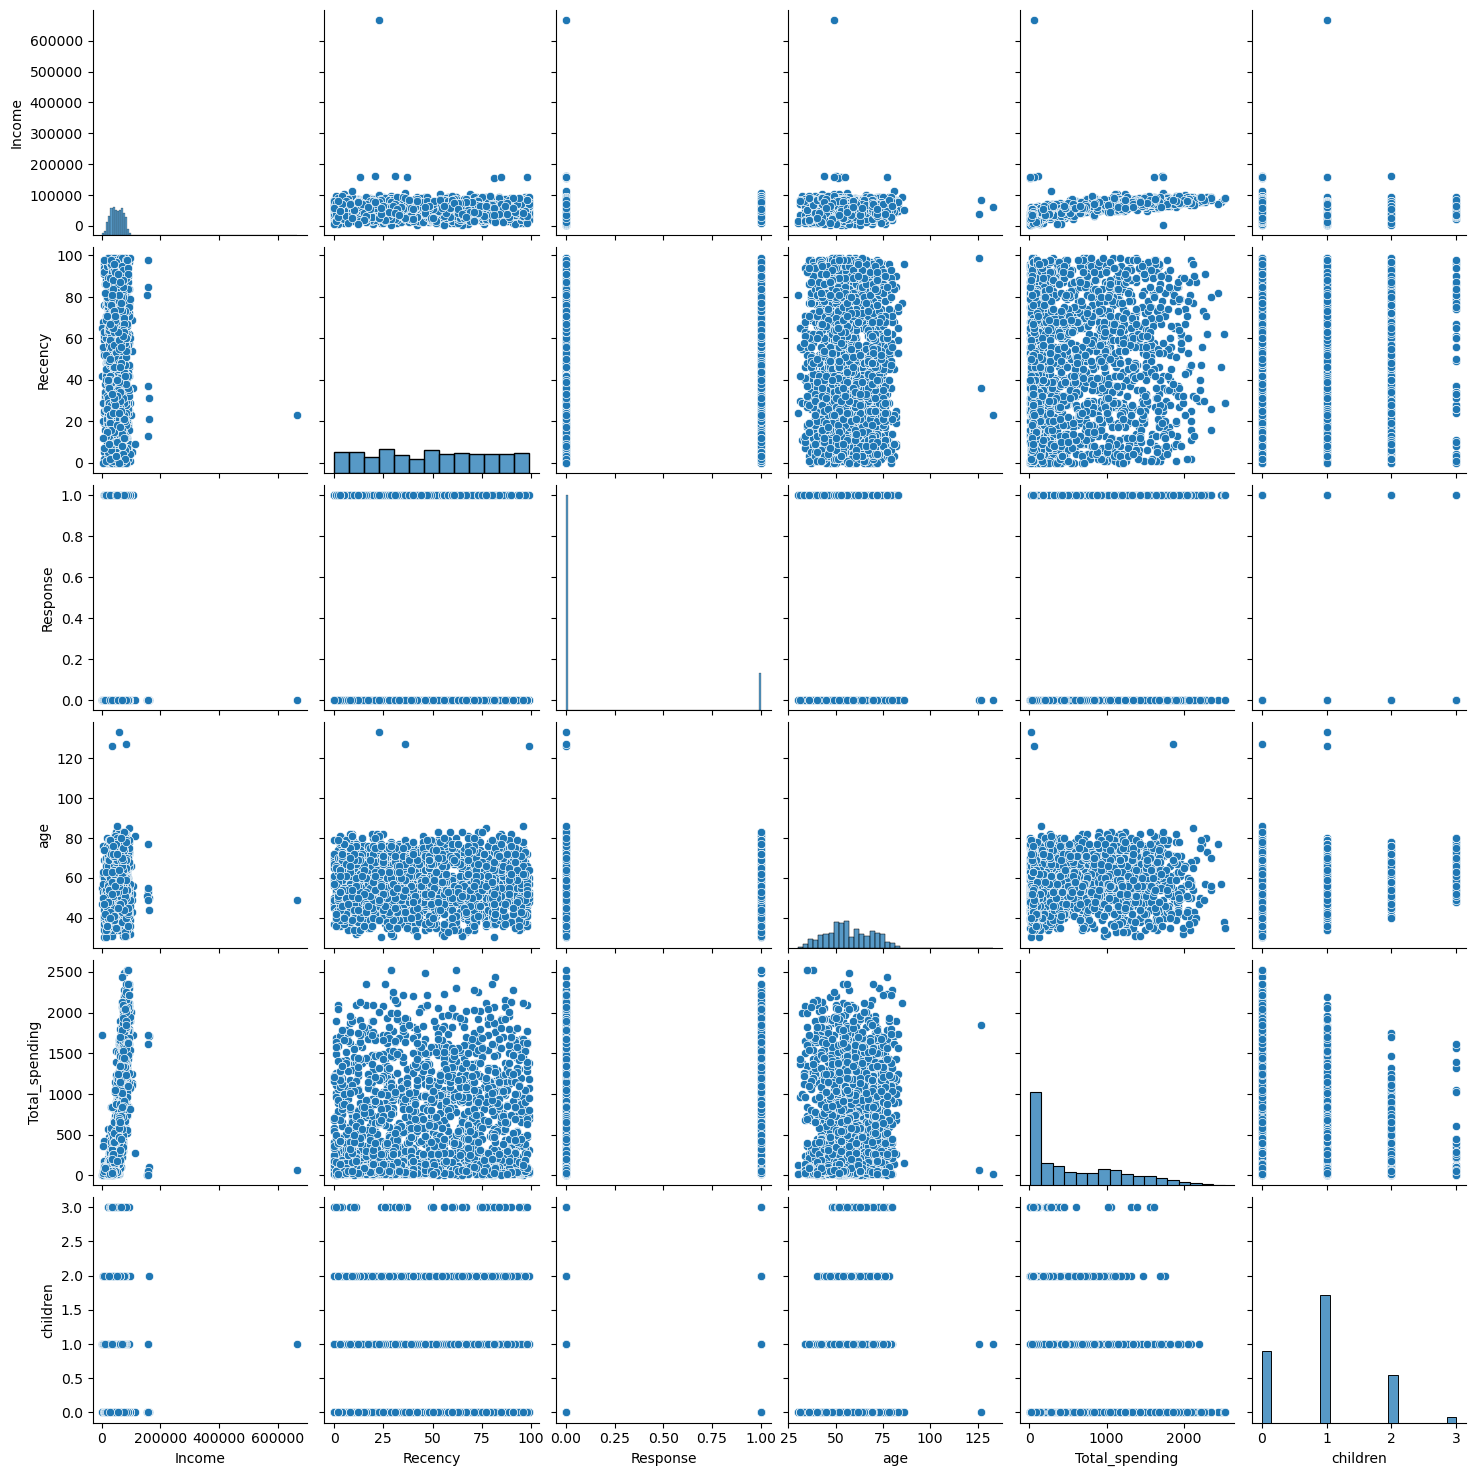

In [44]:
# outlier
cols = ["Income" ,"Recency" ,"Response" , "age" ,"Total_spending" ,"children" , ]
sns.pairplot(df_cleaned[cols])

In [47]:
df.shape

(2240, 27)

In [74]:
df_cleaned = df_cleaned[(df_cleaned["age"] <90 )]
df_cleaned = df_cleaned[(df_cleaned["Income"] <600_000 )]
print("data shape without outlier " , len(df_cleaned))

data shape without outlier  2212


In [71]:
df.shape
df_clean

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,customer_tenure_days,Total_spending,children,Living_with
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1,Partner
2236,Postgraduate,64014.0,56,7,8,2,5,7,0,0,80,19,444,3,Partner
2237,Graduate,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0,Alone
2238,Postgraduate,69245.0,8,2,6,5,10,3,0,0,70,156,843,1,Partner


# Heatmap

<Axes: >

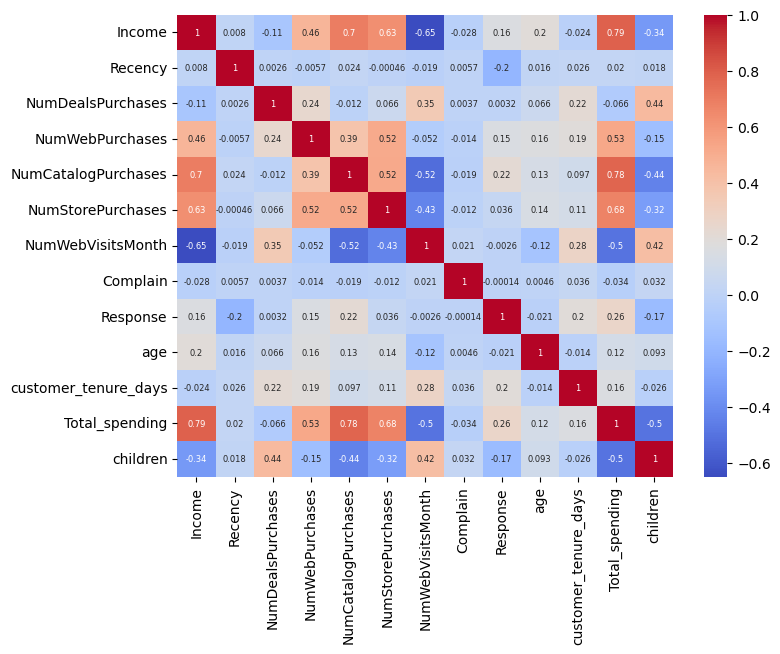

In [75]:
corr = df_cleaned.corr(numeric_only = True)
plt.figure(figsize=(8,6))
sns.heatmap (
    corr ,
    annot = True ,
    annot_kws = {"size" : 6 } ,
    cmap = "coolwarm"  )

In [79]:
ohe = OneHotEncoder()
cat_cols = [ "Education" ,"Living_with"]
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])


In [82]:
enc_df = pd.DataFrame(enc_cols.toarray() , columns = ohe.get_feature_names_out(cat_cols) , index = df_cleaned.index)

In [85]:
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols) , enc_df], axis=1)

In [87]:
df_encoded.shape

(2212, 18)

In [90]:
# Scaling
X = df_encoded 
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [92]:
X_scaled

array([[ 0.28710487,  0.31035323,  0.35102992, ..., -0.35856858,
         1.34960312, -1.34960312],
       [-0.26088203, -0.38081349, -0.16870113, ..., -0.35856858,
         1.34960312, -1.34960312],
       [ 0.9131964 , -0.79551352, -0.68843217, ..., -0.35856858,
        -0.74095857,  0.74095857],
       ...,
       [ 0.23334696,  1.45077832, -0.68843217, ..., -0.35856858,
         1.34960312, -1.34960312],
       [ 0.80317156, -1.41756357, -0.16870113, ..., -0.35856858,
        -0.74095857,  0.74095857],
       [ 0.04229031, -0.31169682,  0.35102992, ..., -0.35856858,
        -0.74095857,  0.74095857]], shape=(2212, 18))

In [96]:
pca = PCA(n_components = 3)
X_PCA = pca.fit_transform(X_scaled)

In [97]:
pca.explained_variance_ratio_

array([0.23258254, 0.11390916, 0.10418299])

Text(0.5, 0.92, '3d projection')

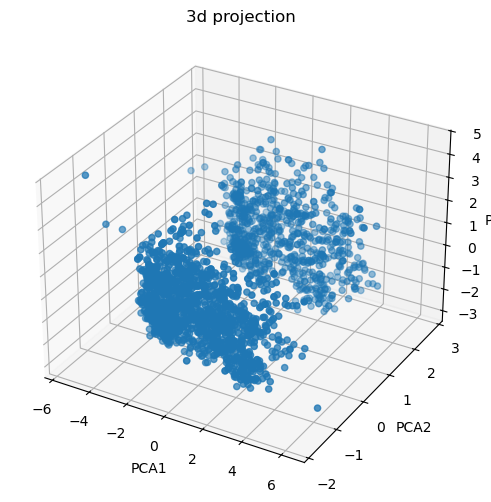

In [102]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111 ,projection ="3d")
ax.scatter(X_PCA[: , 0] ,X_PCA[: , 1] ,X_PCA[: , 2] ,)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

# Analyze K Value

In [123]:
# elbow method
wcss = []
for k in range(1,11) :
    kmeans = KMeans(n_clusters=k, random_state=42,)
    kmeans.fit_predict(X_PCA)
    wcss.append(kmeans.inertia_)
    

D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [114]:
knee = KneeLocator(range(1,11) , wcss , curve="convex" ,direction="decreasing")
optimal_k = knee.elbow

In [115]:
print(optimal_k)

4


Text(0, 0.5, 'wcss')

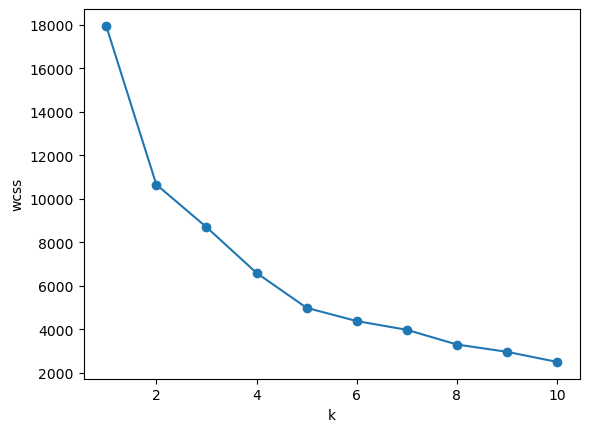

In [117]:
plt.plot(range(1,11) , wcss , marker="o")
plt.xlabel("k")
plt.ylabel("wcss")
         

# 2 silhoutee score


In [124]:
scores = []

for k in range(2,12) :
    kmeans = KMeans(n_clusters=k, random_state=42,)
    labels =kmeans.fit_predict(X_PCA)
    score = silhouette_score(X_PCA, labels)
    scores.append(score)
    

D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, ' silhoutee scores')

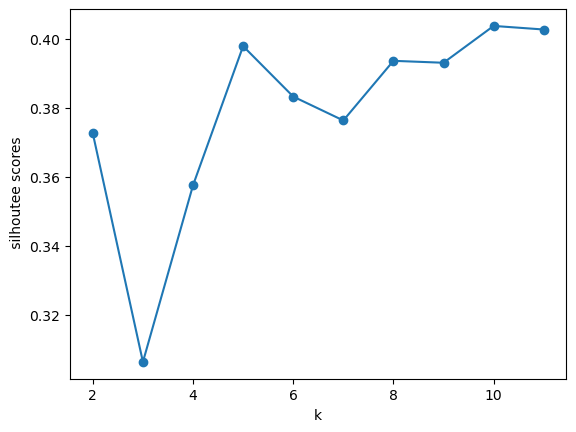

In [128]:
plt.plot(range(2,12) , scores , marker="o")
plt.xlabel("k")
plt.ylabel(" silhoutee scores")
         

# combined plot

Text(0, 0.5, 'silhoutee  score')

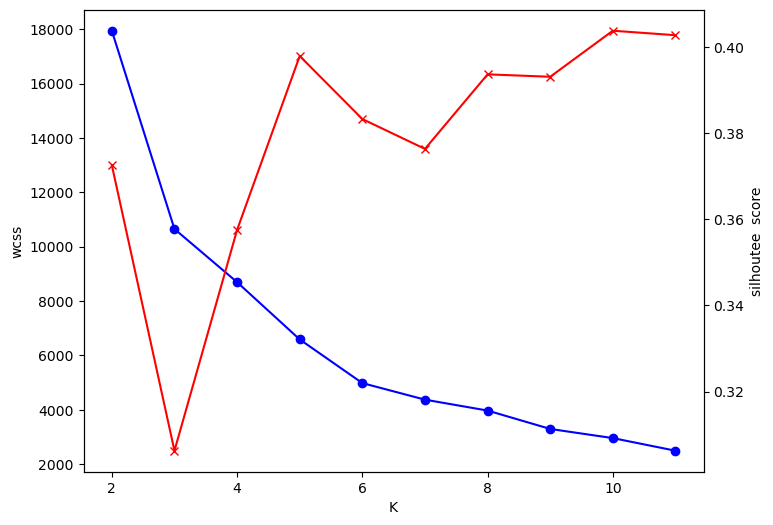

In [135]:
k_range = range(2,12)
fig , ax1 = plt.subplots(figsize=(8,6))
ax1.plot(k_range , wcss[:len(k_range)] ,marker="o" ,color ="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("wcss")

ax2 = ax1.twinx()
ax2.plot(k_range , scores[: len(k_range)] ,marker="x" ,color ="red")
ax2.set_xlabel("K")
ax2.set_ylabel("silhoutee  score")


 # Clustering 

D:\AppData\anacondafiles\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 0.92, '3d projection')

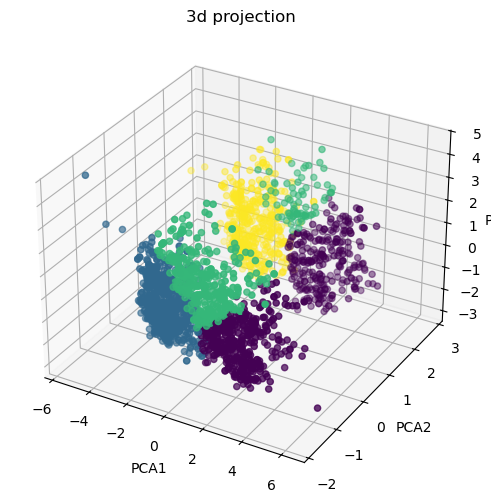

In [139]:
kmeans = KMeans(n_clusters = 4 , random_state =42)
labels_kmeans = kmeans.fit_predict(X_PCA)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111 ,projection ="3d")
ax.scatter(X_PCA[: , 0] ,X_PCA[: , 1] ,X_PCA[: , 2] ,c = labels_kmeans)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

Text(0.5, 0.92, '3d projection')

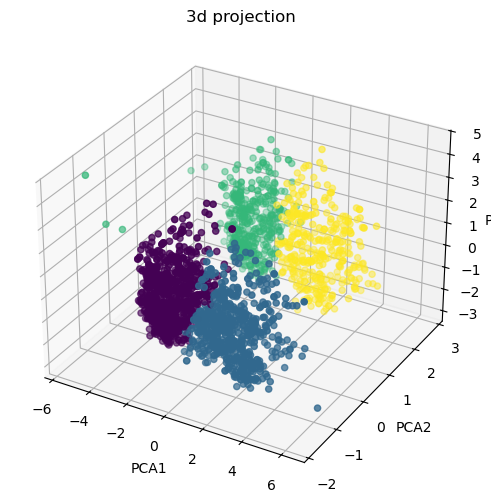

In [142]:
agg_clf = AgglomerativeClustering(n_clusters = 4, linkage ="ward")
labels_agg = agg_clf.fit_predict(X_PCA)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111 ,projection ="3d")
ax.scatter(X_PCA[: , 0] ,X_PCA[: , 1] ,X_PCA[: , 2] ,c = labels_agg)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

# Chracterization of clusters

In [151]:

X["clusters"] = labels_agg
X.head()


,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,age,customer_tenure_days,Total_spending,children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

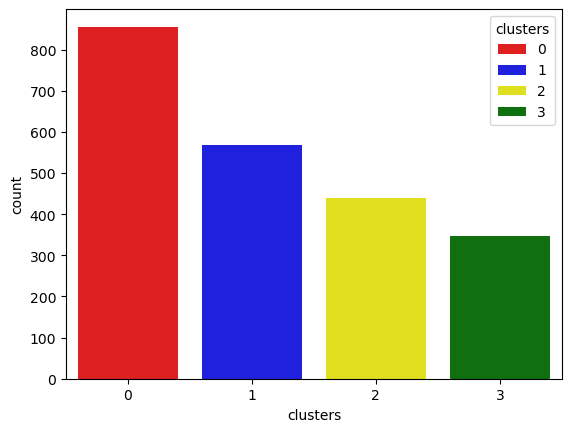

In [152]:
pal = ["red" ,"blue" , "yellow" , "green" ]
sns.countplot(x = X["clusters"] , palette = pal , hue = X["clusters"] )

<Axes: xlabel='Total_spending', ylabel='Income'>

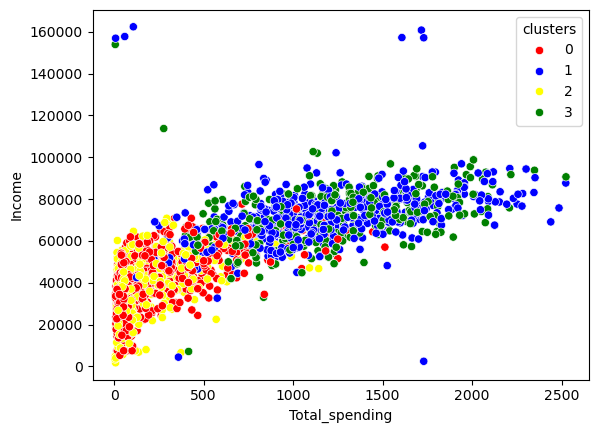

In [153]:
sns.scatterplot(x= X['Total_spending'] , y =X['Income'] , hue =X['clusters'] , palette = pal)

# Cluster Summary

In [156]:
cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         38814.688084  49.113318           2.643692         3.063084   
1         71785.449912  48.810193           1.919156         5.662566   
2         36861.452273  48.034091           2.600000         2.736364   
3         71016.011527  50.380403           1.853026         5.749280   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.941589           4.070093           6.477804  0.009346   
1                    5.230228           8.469244           3.520211  0.008787   
2                    0.854545           3.643182           6.659091  0.011364   
3                    5.051873           8.466859           3.726225  0.005764   

          Response        age  customer_tenure_days  Total_spending  child